In [ ]:
!jt -t onedork

In [2]:
import numpy as np
from sympy import *
from sympy.abc import *
init_printing()
%matplotlib inline  

# Equações Algébricas

In [2]:
#Funções
e = x**2 + 5*x + 1
e

In [3]:
#Equações
Eq(e, 0)

In [4]:
#Equações redutiveis
func = Eq(e, 2*x + x**2)
func

In [5]:
#Equações simplificadas
func.simplify()

In [6]:
#Resolvendo uma equação 
e = Eq(e, 0)
solveset(e)

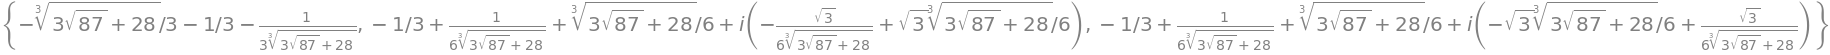

In [7]:
#Resolvendo uma equação 
e = Eq(x**3 + x**2 + 2, 0)
solveset(e)

In [8]:
#Transformando o resultado em decimal
solveset(e).evalf(3)

## Sistema de equações

In [9]:
eq1 = Eq(x + y + z, 0) 
eq2 = Eq(2*x - y - z, 10) 
eq3 = Eq(y + 2*z, 5) 

lista_eq = [eq1, eq2, eq3]

solve([eq1, eq2, eq3],[x,y,z])

# Matrizes

In [10]:
#Matriz solução ax=b
A = Matrix([[14,3,5],[7,8,6],[3,5,12]])
B = Matrix([8,35,15])
x = Matrix(['x','y','z'])
A,x,B

⎛⎡14  3  5 ⎤  ⎡x⎤  ⎡8 ⎤⎞
⎜⎢         ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎜⎢7   8  6 ⎥, ⎢y⎥, ⎢35⎥⎟
⎜⎢         ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎝⎣3   5  12⎦  ⎣z⎦  ⎣15⎦⎠

In [11]:
#Beautify
Eq(A*x,B)

⎡14⋅x + 3⋅y + 5⋅z⎤   ⎡8 ⎤
⎢                ⎥   ⎢  ⎥
⎢7⋅x + 8⋅y + 6⋅z ⎥ = ⎢35⎥
⎢                ⎥   ⎢  ⎥
⎣3⋅x + 5⋅y + 12⋅z⎦   ⎣15⎦

In [12]:
# x = A^-1 * b
sol = A.inv()*B
x, sol

⎛     ⎡-17 ⎤⎞
⎜     ⎢────⎥⎟
⎜     ⎢ 71 ⎥⎟
⎜⎡x⎤  ⎢    ⎥⎟
⎜⎢ ⎥  ⎢372 ⎥⎟
⎜⎢y⎥, ⎢─── ⎥⎟
⎜⎢ ⎥  ⎢ 71 ⎥⎟
⎜⎣z⎦  ⎢    ⎥⎟
⎜     ⎢-62 ⎥⎟
⎜     ⎢────⎥⎟
⎝     ⎣ 71 ⎦⎠

In [13]:
#Decimal e Beautify
Eq(x, sol.evalf(3))

⎡x⎤   ⎡-0.239⎤
⎢ ⎥   ⎢      ⎥
⎢y⎥ = ⎢ 5.24 ⎥
⎢ ⎥   ⎢      ⎥
⎣z⎦   ⎣-0.873⎦

In [18]:
#Operações
A*B

⎡292⎤
⎢   ⎥
⎢426⎥
⎢   ⎥
⎣379⎦

# Equações diferenciais 

## Crescimento populacional 

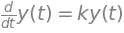

In [4]:
from sympy.abc import *
#Crescimento irrestrito 
y = Function('y')
edo = Eq(Derivative(y(t), t), k*y(t))
(edo)

In [29]:
sol = dsolve(edo)
sol

In [30]:
sol.subs([(t, 2),(k, 4)]).evalf(3)

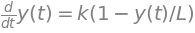

In [31]:
#Crescimento restrito 
y = Function('y')
edo2 = Eq(Derivative(y(t), t), k*(1 - y(t)/L))
edo2

In [32]:
dsolve(edo2)

### Solução numérica do cresc pop restrito

In [52]:
from scipy.integrate import odeint
from scipy.integrate import quad, cumtrapz
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [34]:
#Testando derivadas
%matplotlib inline
x = np.linspace(0, 10, 11)
def f(x):
    return x**2
dfdx = derivative(f, x, dx=1e-6)

print(dfdx)
print(f(x))

[ 0.          2.          4.          6.          8.         10.
 12.         14.         15.99999999 17.99999999 19.99999999]
[  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


In [36]:
def crespop(y, t, K, L):
    dydt = K*(1 - y/L )
    return dydt

#Condições iniciais
t = np.linspace(0, 10, 11)
K = 1
L = 2

y = odeint(crespop, 0, t, args=(K, L))
y

array([[0.        ],
       [0.78693866],
       [1.26424112],
       [1.5537397 ],
       [1.72932946],
       [1.83583003],
       [1.90042587],
       [1.93960523],
       [1.96336872],
       [1.977782  ],
       [1.9865241 ]])

### Aproximando para um polinômio

In [37]:
pol = np.polyfit(t, y, 4)
ply = np.poly1d([float(pol[0]), float(pol[1]), float(pol[2]), float(pol[3]), float(pol[4])])
print(ply)

            4           3          2
-0.0005811 x + 0.01663 x - 0.1814 x + 0.9292 x + 0.007376


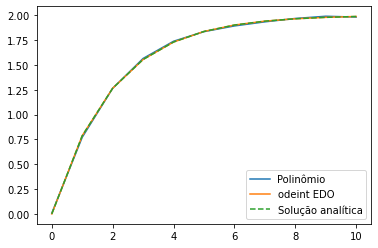

In [38]:
plt.plot(t, ply(t), label='Polinômio')
plt.plot(t, y, label='odeint EDO')
plt.plot(t, (-2*np.e**((-K*t)/L)) + L,'--', label= 'Solução analítica')
plt.legend()

### Considerando L como uma array e controlando a solução

In [39]:
t = np.linspace(0, 10, 11)
K = 1
L = np.zeros(len(t))
L[3:] = 2
L[:3] = 0.01
yO = 0
L

array([0.01, 0.01, 0.01, 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ])

In [40]:
ys = np.zeros(len(t))
ys[0] = yO

for i in range(len(t)-1):
    ts = [t[i], t[i+1]]
    y = odeint(crespop, yO, ts, args=(K, L[i]))
    yO = y[1]
    ys[1+i] = yO
    print(y[1])

[0.01]
[0.01]
[0.01]
[0.79300397]
[1.26791987]
[1.55597087]
[1.73068271]
[1.83665082]
[1.90092367]
[1.93990712]


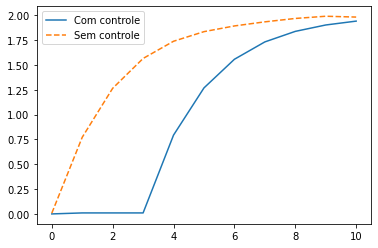

In [41]:
plt.plot(t, ys, label='Com controle')
plt.plot(t, ply(t),'--' ,label='Sem controle')
plt.legend()

## EDOs de decolagem do anderson

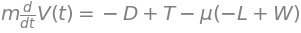

In [44]:
from sympy.abc import *
V = Function('V')
f = Derivative(V(t), t) * m
f = Eq(f, T - D - mu*(W - L))
f

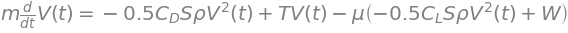

In [45]:
V = Function('V')
Cd, CL = symbols(['C_{D}','C_{L}'])

f = Derivative(V(t), t) * m
f = Eq(f, T*V(t) - 0.5*rho*(V(t)**2)*S*Cd - mu*(W - 0.5*rho*(V(t)**2)*S*CL))
f

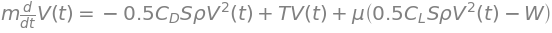

In [46]:
f.simplify()

In [58]:
def EDO_TakeOff(y, t):
    T = Zb.trac_Available(y)
    D = Zb.drag_Force(y, Zb.CLmax)
    R = Zb.mi*(Zb.W - Zb.lift_Force(y, Zb.CLn))
    dvdt = (T - D - R)/(Zb.M)
    return dvdt



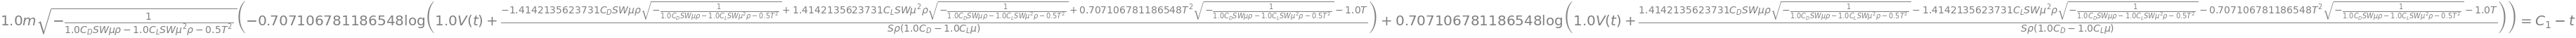

In [48]:
#Resolvendo EDO simbolicamente
sol = dsolve(f)
sol

            4           3          2
-0.0006402 x + 0.03607 x - 0.6935 x + 5.662 x - 2.875


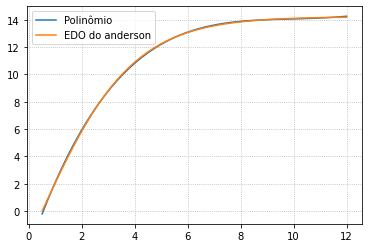

In [51]:
#Função fit
def fit(x, y, grau):
    pol = np.polyfit(x, y, grau)
    lista = []
    for coef in pol:
        lista.append(float(coef))
    poly = np.poly1d(lista)
    return poly

#Condições iniciais
qtd = 50
t = np.linspace(0.5, 12, qtd)
yO = 0

#Resolvendo EDO numérica
y = odeint(EDO_TakeOff, yO, t)

#Aprox para polinômio
pol = fit(t, y, 4)
print(pol)

#plots
plt.plot(t, pol(t), label='Polinômio')
plt.plot(t, y, label='EDO do anderson')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()

In [235]:
#Aceleração
dvdt = derivative(pol, t, dx=1e-6)
dvdt

array([4.83289686, 4.52902865, 4.23805848, 3.9597146 , 3.69372527,
       3.43981874, 3.19772326, 2.96716709, 2.74787848, 2.53958569,
       2.34201698, 2.15490059, 1.97796479, 1.81093782, 1.65354795,
       1.50552342, 1.36659249, 1.23648341, 1.11492445, 1.00164385,
       0.89636986, 0.79883075, 0.70875477, 0.62587017, 0.54990521,
       0.48058814, 0.41764722, 0.36081069, 0.30980682, 0.26436387,
       0.22421007, 0.18907369, 0.15868299, 0.13276621, 0.11105162,
       0.09326747, 0.07914201, 0.06840349, 0.06078017, 0.05600031,
       0.05379216, 0.05388397, 0.056004  , 0.05988051, 0.06524174,
       0.07181596, 0.07933141, 0.08751636, 0.09609905, 0.10480774])

In [54]:
# Spaço
s = cumtrapz(pol(t), t)
s

array([8.36137728e-02, 4.26234831e-01, 1.01224258e+00, 1.82662779e+00,
       2.85498166e+00, 4.08348488e+00, 5.49889669e+00, 7.08854393e+00,
       8.84031012e+00, 1.07426245e+01, 1.27844510e+01, 1.49552777e+01,
       1.72451052e+01, 1.96444362e+01, 2.21442646e+01, 2.47360642e+01,
       2.74117780e+01, 3.01638072e+01, 3.29850002e+01, 3.58686417e+01,
       3.88084421e+01, 4.17985258e+01, 4.48334210e+01, 4.79080482e+01,
       5.10177099e+01, 5.41580790e+01, 5.73251881e+01, 6.05154188e+01,
       6.37254903e+01, 6.69524491e+01, 7.01936573e+01, 7.34467822e+01,
       7.67097852e+01, 7.99809108e+01, 8.32586759e+01, 8.65418583e+01,
       8.98294866e+01, 9.31208284e+01, 9.64153799e+01, 9.97128550e+01,
       1.03013174e+02, 1.06316452e+02, 1.09622991e+02, 1.12933265e+02,
       1.16247910e+02, 1.19567717e+02, 1.22893614e+02, 1.26226662e+02,
       1.29568040e+02])

## Flabagem de uma viga

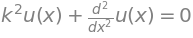

In [55]:
u = Function('u')
EDO1 = Eq(Derivative(u(x), x, x) + (k**2)*u(x), 0) 
EDO1

In [56]:
sol1 = dsolve(EDO1, u(x))
sol1.simplify()

## Sistema massa-mola

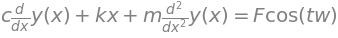

In [60]:
from sympy.abc import *

y = Function('y')
EDO = Eq(m*Derivative(y(x), x, x) + c*Derivative(y(x), x) + k*x, F*cos(w*t)) 
sol = dsolve(EDO, y(x))

EDO

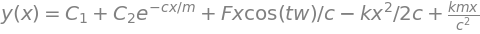

In [61]:
sol

In [62]:
latex(sol)

'y{\\left(x \\right)} = C_{1} + C_{2} e^{- \\frac{c x}{m}} + \\frac{F x \\cos{\\left(t w \\right)}}{c} - \\frac{k x^{2}}{2 c} + \\frac{k m x}{c^{2}}'

## Tensores 

In [78]:
from sympy.abc import *

a1 = Array([[1, 2], [3, 4], [5, 6]])
a2 = Array([[5, 3], [4, 2], [1, 4]])

m1 = Array([x**3, x*y, z])
m2 = Array([2*x, 3*x*y, z**2])
m_dot = tensorproduct(m1, m2)

Eq(m_dot, 0)

⎡    4      4      3  2 ⎤    
⎢ 2⋅x    3⋅x ⋅y   x ⋅z  ⎥    
⎢                       ⎥    
⎢   2       2  2       2⎥    
⎢2⋅x ⋅y  3⋅x ⋅y   x⋅y⋅z ⎥ = 0
⎢                       ⎥    
⎢                    3  ⎥    
⎣2⋅x⋅z   3⋅x⋅y⋅z    z   ⎦    

In [81]:
xx = symbols('d_{x}')
xx

In [155]:
import numpy as np
from sympy import *
from sympy.abc import *
from sympy.abc import * #não usar isso! Burro
init_printing()

r1, r2 , r3 = symbols('R_{1}  R_{2}  R_{3} ')

psi = symbols('\psi_{1} \psi_{2} \psi_{3}')
phi = symbols('\phi_{1} \phi_{2} \phi_{3}')

x = Matrix([r1, r2, r3])

A = Matrix([[cos(phi[0]), -cos(psi[0]), 1], 
           [cos(phi[1]), -cos(psi[1]), 1], 
           [cos(phi[2]), -cos(psi[2]), 1]])

b = Matrix([[cos(phi[0] - psi[0])], 
            [cos(phi[1] - psi[1])], 
            [cos(phi[2] - psi[2])]])
x, A, b

⎛⎡R_{1}⎤  ⎡cos(\phi_{1})  -cos(\psi_{1})  1⎤  ⎡cos(\phi_{1} - \psi_{1})⎤⎞
⎜⎢     ⎥  ⎢                                ⎥  ⎢                        ⎥⎟
⎜⎢R_{2}⎥, ⎢cos(\phi_{2})  -cos(\psi_{2})  1⎥, ⎢cos(\phi_{2} - \psi_{2})⎥⎟
⎜⎢     ⎥  ⎢                                ⎥  ⎢                        ⎥⎟
⎝⎣R_{3}⎦  ⎣cos(\phi_{3})  -cos(\psi_{3})  1⎦  ⎣cos(\phi_{3} - \psi_{3})⎦⎠

In [156]:
Eq(A*x, b, evaluate=False)

⎡R_{1}⋅cos(\phi_{1}) - R_{2}⋅cos(\psi_{1}) + R_{3}⎤   ⎡cos(\phi_{1} - \psi_{1}
⎢                                                 ⎥   ⎢                       
⎢R_{1}⋅cos(\phi_{2}) - R_{2}⋅cos(\psi_{2}) + R_{3}⎥ = ⎢cos(\phi_{2} - \psi_{2}
⎢                                                 ⎥   ⎢                       
⎣R_{1}⋅cos(\phi_{3}) - R_{2}⋅cos(\psi_{3}) + R_{3}⎦   ⎣cos(\phi_{3} - \psi_{3}

)⎤
 ⎥
)⎥
 ⎥
)⎦

In [163]:
phi_n = [92.287, 120, 170.213]
psi_n = [36.075, 75, 113.925]

phi_n = np.radians(phi_n)
psi_n = np.radians(psi_n)  

A.subs([(phi, phi_n), (psi, psi_n)])

A, b

⎛⎡-0.0399050814846968  -0.808246892384353  1⎤  ⎡0.556121562320388⎤⎞
⎜⎢                                          ⎥  ⎢                 ⎥⎟
⎜⎢       -0.5          -0.258819045102521  1⎥, ⎢0.707106781186548⎥⎟
⎜⎢                                          ⎥  ⎢                 ⎥⎟
⎝⎣-0.985446492428912    0.40554046674354   1⎦  ⎣0.555018659341506⎦⎠

In [164]:
Eq((A*x).evalf(3), b.evalf(3), evaluate=False)

⎡-0.0399⋅R_{1} - 0.808⋅R_{2} + R_{3}⎤   ⎡0.556⎤
⎢                                   ⎥   ⎢     ⎥
⎢ -0.5⋅R_{1} - 0.259⋅R_{2} + R_{3}  ⎥ = ⎢0.707⎥
⎢                                   ⎥   ⎢     ⎥
⎣-0.985⋅R_{1} + 0.406⋅R_{2} + R_{3} ⎦   ⎣0.555⎦

In [165]:
Eq(x, (A.inv()*b).evalf(3))

⎡R_{1}⎤   ⎡-4.72⎤
⎢     ⎥   ⎢     ⎥
⎢R_{2}⎥ = ⎢-3.68⎥
⎢     ⎥   ⎢     ⎥
⎣R_{3}⎦   ⎣-2.6 ⎦